# <font color='orange'>   **Het Netwerk** </font>


### MIS NETWORK OPTIMIZATION of APC GRAPH
***


**Graph Theory Eulerian Circuit Optimization https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial**


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2 
import pandas as pd 

%config IPCompleter.greedy=True


In [2]:
conn_1 = psycopg2.connect(user = "postgres",
                                  password = "",
                                  host = "",
                                  port = "",
                                  database = "")
cursor_1 = conn_1.cursor()
print (conn_1.get_dsn_parameters(),"\n")

{'user': 'postgres', 'dbname': 'TunnlDB', 'host': '34.77.230.6', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 



In [3]:
Ass_data = pd.read_sql_query(' SELECT "AssTitle", "PlaName" ,"ParName","IngNet","IngDate" FROM dbo."Part_InGameReport_1912" join dbo."Partner" on "ParId" = "IngParId"join dbo."Platform" on "PlaId" = "IngPlaId" join dbo."Asset" on "AssId" = "IngAssId" LIMIT 10',conn_1)

Ass_data.head()

,AssTitle,PlaName,ParName,IngNet,IngDate
0,Klondike,bildspielt.de,Axel Springer German,40.9700,2019-12-01 00:20:38
1,Family Barn,spielesite.com,Spielesite.com / de-info@spielesite.com,0.4605,2019-12-01 00:21:46
2,Royal Story,plinga.com,Plinga,3.7400,2019-12-01 00:25:53
3,Knights and Brides,minijuegos.com,Moonsite,2.0700,2019-12-01 01:14:00
4,Klondike,plinga.de,Blume62,41.4000,2019-12-01 01:27:12


In [4]:
df = nx.from_pandas_edgelist(Ass_data, source='AssTitle', target='ParName', edge_attr=True)
        

In [5]:
df.nodes()

NodeView(('Klondike', 'Axel Springer German', 'Family Barn', 'Spielesite.com / de-info@spielesite.com', 'Royal Story', 'Plinga', 'Knights and Brides', 'Moonsite', 'Blume62', 'Gamefools', 'WildTangent'))

In [12]:
df.edges()

EdgeView([(40.97, 'Axel Springer German'), (40.97, 'adspree Media'), (40.97, 'Gamedesire'), (40.97, 'Plinga'), (40.97, 'RTL interactive GmbH'), (40.97, 't-online.de / Digital Media Products GmbH'), (40.97, 'Stroer Media Brands'), (40.97, 'Tolle & Wendt GbR'), (40.97, 'We Love X'), ('Axel Springer German', 0.64), ('Axel Springer German', 2.4505), ('Axel Springer German', 14.08), ('Axel Springer German', 11.51), ('Axel Springer German', 3.83), ('Axel Springer German', 16.21), ('Axel Springer German', 0.53), ('Axel Springer German', 7.035), ('Axel Springer German', 3.6005), (0.4605, 'Spielesite.com / de-info@spielesite.com'), (0.4605, 'RTL interactive GmbH'), (0.4605, 'Asert'), (0.4605, 'adspree Media'), (0.4605, 'RTL2 Fernsehen GmbH & Co.KG'), (0.4605, 'Stroer Media Brands'), (0.4605, 'Spiele Kostenlos Online'), (0.4605, 'Brumb'), ('Spielesite.com / de-info@spielesite.com', 7.96), ('Spielesite.com / de-info@spielesite.com', 16.21), ('Spielesite.com / de-info@spielesite.com', 14.08), ('Sp

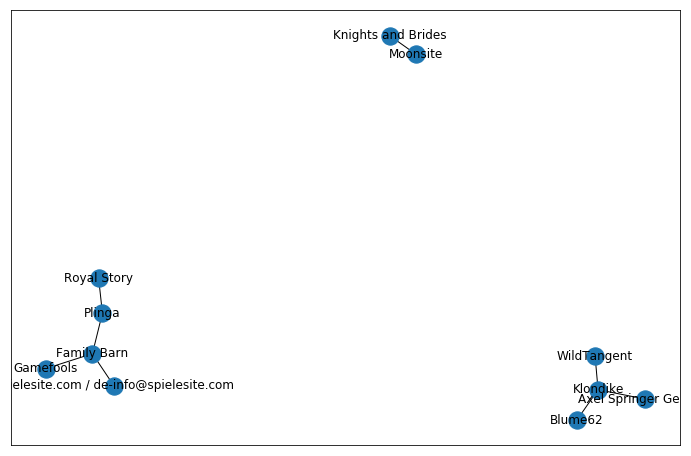

In [6]:
plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)